## note that part of the report of this file is in the report.pdf

ابتدا باید کتاب خانه 

nashpy  

را نصب کنیم

In [4]:
# !pip install nashpy

با  چند دستور ابتدایی این کتابخانه شروع میکنیم و آنها را توضیح میدهیم ...

در این قسمت هر دو جدول بازیکن سطر وستون با یکدیگر برابر هستند

In [2]:
import nashpy as nash
import numpy as np
A = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])
rps = nash.Game(A)
print(rps)

Zero sum game with payoff matrices:

Row player:
[[ 0 -1  1]
 [ 1  0 -1]
 [-1  1  0]]

Column player:
[[ 0  1 -1]
 [-1  0  1]
 [ 1 -1  0]]


اگر ماتریس های دو بازیکن با یکدیگر برابر نباشند به صورت زیر میتوانیم انجام دهیم

In [7]:
B =np.array([[1, 0, 1], [1, 1, -1], [-1, 1, -1]])
rps = nash.Game(A, B)
print(rps)

Bi matrix game with payoff matrices:

Row player:
[[ 0 -1  1]
 [ 1  0 -1]
 [-1  1  0]]

Column player:
[[ 1  0  1]
 [ 1  1 -1]
 [-1  1 -1]]


برای به دست آوردن یوتیلیتی یک استراتژی از جدول به صورت زیر انجام میدهیم

In [11]:
sigma_r = [0, 0, 1]
sigma_c = [0, 1, 0]
print(rps[sigma_r, sigma_c])

[1 1]


حال میخواهیم با استفاده از این کتابخانه نقطه(نقاط) تعادل نش بازی سنگ کاغذ قیجی را که در قسمت اول دیدید را پیدا کنیم.
یک بار با استفاده از

game.support_enumeration 

و بارهای دیگر با استفاده از 

game.vertex_enumeration , Lemke Howson

کد را پیاده سازی کنید. 
و در پایان با جستجو در اینترنت بگویید که تفاوت عملکرد این سه در جیست و خروجی هر سه را با هم مقایسه کنید.
آیا خروجی یا 

pure strategy 


است یا

 mixed strategy?


In [12]:
eqs = rps.support_enumeration()
list(eqs)

C:\Users\Hesam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\nashpy\algorithms\support_enumeration.py:259: RuntimeWarning: 
An even number of (4) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)


[(array([1., 0., 0.]), array([0., 0., 1.])),
 (array([0., 1., 0.]), array([1., 0., 0.])),
 (array([0., 0., 1.]), array([0., 1., 0.])),
 (array([0.66666667, 0.        , 0.33333333]),
  array([0.        , 0.33333333, 0.66666667]))]

همانطور که میبینیم آخرین دو آرایه آخر ایندکس های غیر صحیح دارند که این دو عبارتند از نقاط تعادل میکس شده .
که همان عبارت احتمالی برای انتخاب استراتژی مورد قبول یک فرد را میدهند.

our explantion about three above methods is the the project report

In [9]:
A = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])
#since our game is symtric:
rps = nash.Game(A)
print(list(rps.support_enumeration()))

[(array([0.33333333, 0.33333333, 0.33333333]), array([0.33333333, 0.33333333, 0.33333333]))]


which is the same what we calculated before for mixed strategy


In [11]:
A = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])
#since our game is symtric:
rps = nash.Game(A)
print(list(rps.vertex_enumeration()))

[(array([0.33333333, 0.33333333, 0.33333333]), array([0.33333333, 0.33333333, 0.33333333]))]


which is the same what we calculated before for mixed strategy

In [17]:
A = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])
#since our game is symtric:
rps = nash.Game(A)
print(list(rps.lemke_howson(initial_dropped_label=0)))

[array([0.33333333, 0.33333333, 0.33333333]), array([0.33333333, 0.33333333, 0.33333333])]


which is the same what we calculated before for mixed strategy
the initial_dropped_label is an integer between 0 and sum(A.shape) - 1

برای چک کردن این که یک استراتژی بهترین جواب است  از کد زیر استفاده میکنیم.

In [ ]:
sigma_r = np.array([0, 1, 0])
sigma_c = np.array([1, 0, 0])
print(rps.is_best_response(sigma_r, sigma_c))

(True, True)



ابتدا درباره مساله 

matching pennies 

تحقیق کنید.
اگر بخواهیم چند بار انتخاب استراتژی انجام بگیرد، کدی بنویسید که تکرار عملیات صورت بگیرد
تعداد تکرار را برابر 2 رد نظر بگیرید. 
ماتریس بازی را نمایش دهید.

### complete code:

In [3]:
import nashpy.repeated_games 
A = np.array([[1, -1], [-1, 1]])
matching_pennies = nash.Game(A)
repeated = nashpy.repeated_games.obtain_repeated_game(game=matching_pennies, repetitions=2)
print(repeated)
repeated.payoff_matrices[0].shape

Zero sum game with payoff matrices:

Row player:
[[ 2.  2.  2. ...  0. -2. -2.]
 [ 2.  2.  2. ...  0. -2. -2.]
 [ 2.  2.  2. ...  0. -2. -2.]
 ...
 [ 0.  0.  0. ...  2.  0.  2.]
 [-2. -2. -2. ...  0.  2.  0.]
 [-2. -2. -2. ...  2.  0.  2.]]

Column player:
[[-2. -2. -2. ...  0.  2.  2.]
 [-2. -2. -2. ...  0.  2.  2.]
 [-2. -2. -2. ...  0.  2.  2.]
 ...
 [ 0.  0.  0. ... -2.  0. -2.]
 [ 2.  2.  2. ...  0. -2.  0.]
 [ 2.  2.  2. ... -2.  0. -2.]]


(32, 32)

حال اگر بخواهیم تعداد تکرار ها را بیشتر کنیم چه؟
برای تکرار های بیشتر این روش محاسبات زیادی میخواهد بجایش از روش های لرنینگ استفاده میکنیم.


در زیر الگوریتم فیکتس

game.fictitious_play

یکی از روش های لرن کردن میباشد.
البته همیشه این الگوریتم همگرا نمیشود 

In [4]:
A = np.array([[0, 1, 0], [0, 0, 1], [1, 0, 0]])
B = np.array([[0, 0, 1], [1, 0, 0], [0, 1, 0]])
game = nash.Game(A, B)
iterations = 10000
np.random.seed(0)
play_counts = tuple(game.fictitious_play(iterations=iterations))
play_counts[-1]

[array([5464., 1436., 3100.]), array([2111., 4550., 3339.])]

در مساله فوق اعداد آرایه

play_counts 

باید بر تعداد 

iteration 

تقسیم کنید تا احتمال هر استراتژی بدست بیاید و خروجی را نشان دهید.
و در نهایت احتمال هر استراتژی را برای بازیکن اول
row player
را نسبت به  

.iterations

پلاتد کنید
آیا الگوریتمها همگرا میشوند؟ توضیح دهید...
 
 
 
شما صرفا باید به روش گفته شده ptobabilities 
را بصورت مناسب تعریف کنید ...

### complete code:

C:\Users\Hesam\AppData\Local\Temp\ipykernel_10312\3346560346.py:4: RuntimeWarning: invalid value encountered in divide
  probabilities = [row_play_counts / np.sum(row_play_counts) for row_play_counts, col_play_counts in play_counts]


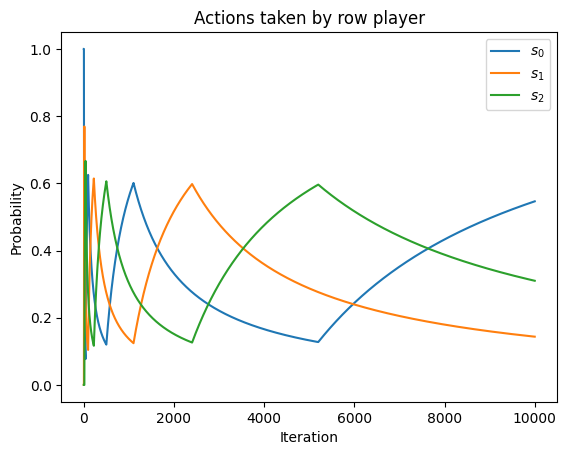

In [5]:
import matplotlib.pyplot as plt
plt.figure() 

probabilities = [row_play_counts / np.sum(row_play_counts) for row_play_counts, col_play_counts in play_counts]

for number, strategy in enumerate(zip(*probabilities)):
    plt.plot(strategy, label=f"$s_{number}$")  

    
    
plt.xlabel("Iteration")  
plt.ylabel("Probability")  
plt.title("Actions taken by row player")  
plt.legend() 

We can visualise the lack of convergence

این بار برای ماتریس های

A , B

همان الگوریتم قبلی را تکرار کنید و نشان دهید که این بار برای بازیکن دوم الگوریتم ها همگرا میشوند

In [37]:
A = np.array([[1 / 2, 1, 0], [0, 1 / 2, 1], [1, 0, 1 / 2]])
B = np.array([[1 / 2, 0, 1], [1, 1 / 2, 0], [0, 1, 1 / 2]])
game = nash.Game(A, B)
np.random.seed(0)
play_counts = tuple(game.fictitious_play(iterations=iterations))
play_counts[-1]

[array([3290., 3320., 3390.]), array([3356., 3361., 3283.])]

C:\Users\Hesam\AppData\Local\Temp\ipykernel_19232\2852150636.py:3: RuntimeWarning: invalid value encountered in divide
  probabilities = [row_play_counts / np.sum(row_play_counts) for row_play_counts, col_play_counts in play_counts]


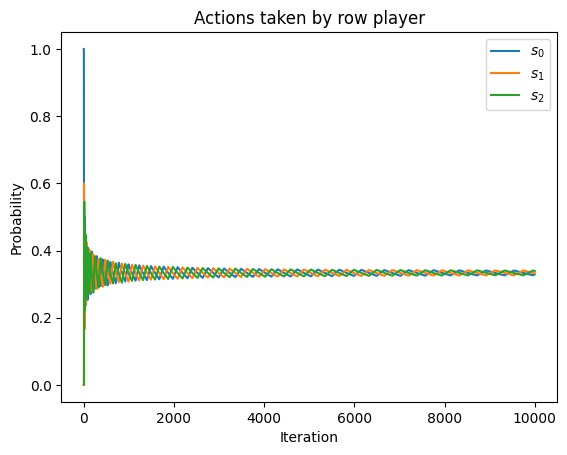

In [38]:
import matplotlib.pyplot as plt
plt.figure() 
probabilities = [row_play_counts / np.sum(row_play_counts) for row_play_counts, col_play_counts in play_counts]
for number, strategy in enumerate(zip(*probabilities)):
    plt.plot(strategy, label=f"$s_{number}$")  
plt.xlabel("Iteration")  
plt.ylabel("Probability")  
plt.title("Actions taken by row player")  
plt.legend()  

we see a clear convergence now 

حال میخواهیم ببینیم یک بازیکن در گذر زمان چه احتمالی از استراتژی ها را بازی میکند.
 با استفاده از الگوریتم 

replicator dynamics

برای ماتریس های  هزینه َA,
این کار را انجام دهید.
( البته پیش از این کار همانند قسمت قبل 
احتمال هر استراتژی را برای بازیکن اول و دوم پلات بگیرید)

C:\Users\Hesam\AppData\Local\Temp\ipykernel_10312\2991151218.py:10: RuntimeWarning: invalid value encountered in divide
  probabilities = [row_play_counts / np.sum(row_play_counts) for row_play_counts, col_play_counts in play_counts]


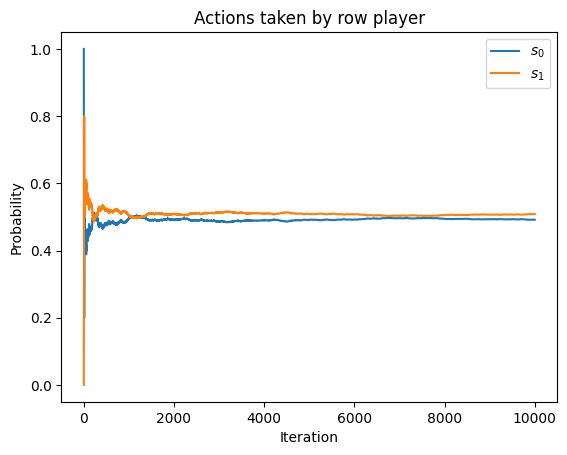

In [6]:
import nashpy as nash
import numpy as np
A = np.array([[3, 2], [4, 2]])
B = np.array([[1, 3], [2, 4]])
game = nash.Game(A,B)
np.random.seed(0)
play_counts = tuple(game.fictitious_play(iterations=iterations))
play_counts[-1]
plt.figure() 
probabilities = [row_play_counts / np.sum(row_play_counts) for row_play_counts, col_play_counts in play_counts]
for number, strategy in enumerate(zip(*probabilities)):
    plt.plot(strategy, label=f"$s_{number}$")  
plt.xlabel("Iteration")  
plt.ylabel("Probability")  
plt.title("Actions taken by row player")  
plt.legend()  

since the game is symetric we can say that the other player haw the same plot

The replicator_dynamics method returns the strategies of the row player over time:

In [42]:
game.replicator_dynamics()

array([[0.5       , 0.5       ],
       [0.49875032, 0.50124968],
       [0.49750377, 0.50249623],
       ...,
       [0.10199196, 0.89800804],
       [0.10189853, 0.89810147],
       [0.10180527, 0.89819473]])

It is also possible to pass a y0 variable in order to assign a starting strategy. Otherwise the probability is divided equally amongst all possible actions. Passing a timepoints variable gives the algorithm a sequence of timepoints over which to calculate the strategies:

In [43]:
y0 = np.array([0.9, 0.1])
timepoints = np.linspace(0, 10, 1000)
game.replicator_dynamics(y0=y0, timepoints=timepoints)

array([[0.9       , 0.1       ],
       [0.89918663, 0.10081337],
       [0.89836814, 0.10163186],
       ...,
       [0.14109126, 0.85890874],
       [0.1409203 , 0.8590797 ],
       [0.14074972, 0.85925028]])